# TABLE OF AGREEMENT

In [1]:
import pandas as pd

import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from utils import *

plt.style.use('../style.mplstyle')
df = pd.read_csv("../latest.csv")

c:\Users\sevi\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
df = fix_data(df, drop_zeros=False)

In [3]:
print("length of df: ", len(df))
print('\n')
df.head(1)

length of df:  106




,StartDate,reading,Duration,Progress,Finished,Q42,Q43,Q1,Q1_7_TEXT,Q2,...,Q16_3,Q16_4,Q16_5,Q16_6,Q16_7,Q16_8,Q16_9,Q17,Q18,Q46
0,2024-08-08 23:30:29,7,118,100,True,Agree,LinkedIn DM,Industry,NaN,2.0,...,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,NaN,NaN,NaN


In [4]:


# Assuming df is your DataFrame
# Create lists of pre- and post-reading question columns
pre_questions = [f'Q6_{i}' for i in range(1, 10)]
post_questions = [f'Q16_{i}' for i in range(1, 10)]



In [5]:
df[pre_questions].value_counts()

Q6_1                        Q6_2                        Q6_3                        Q6_4                        Q6_5                        Q6_6                        Q6_7                        Q6_8                        Q6_9                      
Somewhat agree              Somewhat agree              Somewhat agree              Somewhat agree              Somewhat agree              Somewhat agree              Somewhat agree              Somewhat agree              Somewhat agree                3
Neither agree nor disagree  Neither agree nor disagree  Neither agree nor disagree  Neither agree nor disagree  Neither agree nor disagree  Neither agree nor disagree  Neither agree nor disagree  Neither agree nor disagree  Neither agree nor disagree    2
Somewhat disagree           Neither agree nor disagree  Somewhat disagree           Neither agree nor disagree  Somewhat disagree           Somewhat disagree           Neither agree nor disagree  strongly disagree           Somewhat agre

In [6]:
# change the likert scale to numerical
swaps = {
    "strongly disagree": 1,
    "Somewhat disagree": 2,
    "Neither agree nor disagree": 3,
    "Somewhat agree": 4,
    "Strongly agree": 5,
}

df[pre_questions] = df[pre_questions].replace(swaps)
df[post_questions] = df[post_questions].replace(swaps)

In [7]:

# Calculate mean agreement scores for pre- and post-reading
pre_means = df[pre_questions].mean()
post_means = df[post_questions].mean()

In [8]:


pre_group_means = df.groupby('Q1')[pre_questions].mean()
post_group_means = df.groupby('Q1')[post_questions].mean()


# STANDARD DEVIATION

In [45]:

def plot_agreement_levels(questions_to_include, figure_size=(15, 9), pre_means=None, pre_group_means=None, post_group_means=None, title=None):
    fig, ax = plt.subplots(figsize=figure_size)

    # x should be the same as the number of questions in questions_to_include
    x = range(1, len(questions_to_include) + 1)

    bar_width = 0.6

    # Calculate total means and standard deviations
    total_means = pre_means[questions_to_include]


    # total_stds = df[['Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q6_6', 'Q6_7', 'Q6_8', 'Q6_9']].std()
    # calculate total stds for only the questions in questions_to_include
    total_stds = df[questions_to_include].std()

    # Plot total means with error bars
    bars = ax.bar(x, total_means, color='lightblue', alpha=0.7, width=bar_width, yerr=total_stds, capsize=5, zorder=1)

    groups = ['AI Safety Researcher', 'Academic', 'Industry', 'Other']
    colors = sns.color_palette("husl", n_colors=len(groups))

    # Calculate offsets for spreading out the points
    num_groups = len(groups)
    offsets = np.linspace(-bar_width/2 + bar_width/(num_groups*2), 
                        bar_width/2 - bar_width/(num_groups*2), 
                        num_groups)

    # Plot group means as scatter points with error bars
    for i, group in enumerate(groups):
        pre_group_means_row = pre_group_means.loc[group, questions_to_include]
        
        group_stds = df[df['Q1'] == group][questions_to_include].std()
        
        for j in range(len(questions_to_include)):
            x_pos = x[j] + offsets[i]
            ax.errorbar(x_pos, pre_group_means_row[j], yerr=group_stds[j], 
                        fmt='o', color=colors[i], capsize=5, capthick=1, zorder=2)

    # Customize the plot
    ax.set_ylabel('Agreement Level', fontsize='medium')
    ax.set_xlabel('Statements', fontsize='medium')
    ax.set_title(title, fontsize='large')
    ax.set_xticks(x)
    ax.set_xticklabels([f'S{i}' for i in x])

    # Create legend with correct colors
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=group, 
                    markerfacecolor=color, markersize=10) 
                    for group, color in zip(groups, colors)]
    ax.legend(handles=legend_elements, title='Groups', fontsize='x-small', title_fontsize='small')

    # Set y-axis limits to accommodate error bars
    y_min = 0  # Assuming agreement levels start at 0
    y_max = max((pre_group_means + group_stds).max().max(), (total_means + total_stds).max()) + 0.5
    ax.set_ylim(y_min, y_max)
    # ax.set_ylim(1, 5)

    plt.tight_layout()
    plt.show()

In [46]:
pre_questions

['Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q6_6', 'Q6_7', 'Q6_8', 'Q6_9']

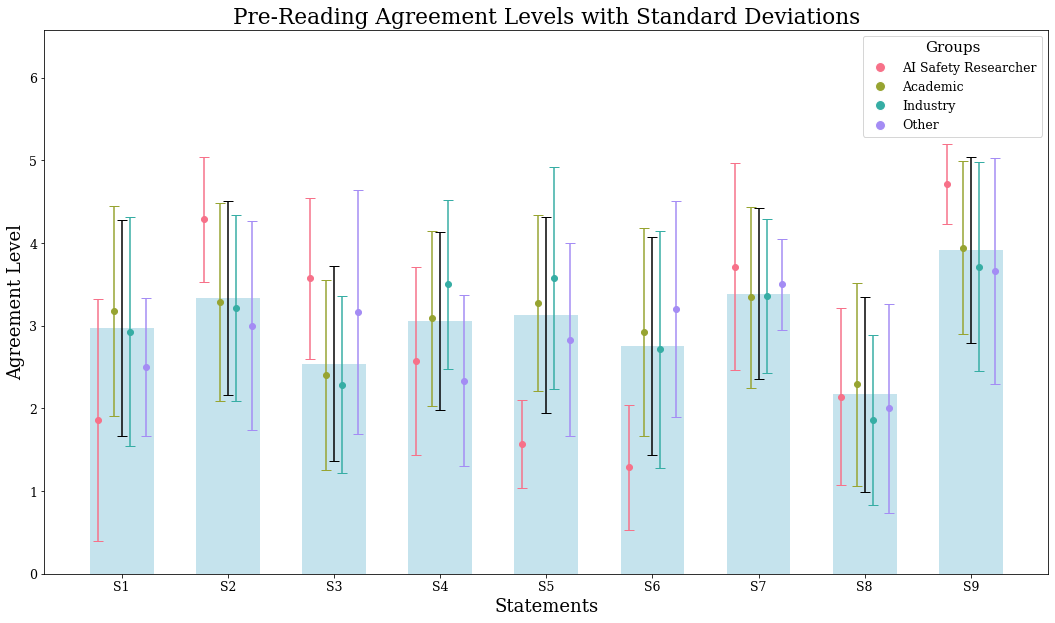

In [47]:
plot_agreement_levels(pre_questions, pre_means=pre_means, pre_group_means=pre_group_means, post_group_means=post_group_means, title='Pre-Reading Agreement Levels with Standard Deviations')

In [48]:
priority = [1, 5, 9]
technical = [3,4,6,7]
other = [2,8]

priority_questions = [f'Q6_{i}' for i in priority]
technical_questions = [f'Q6_{i}' for i in technical]
other_questions = [f'Q6_{i}' for i in other]


In [49]:
priority_questions

['Q6_1', 'Q6_5', 'Q6_9']

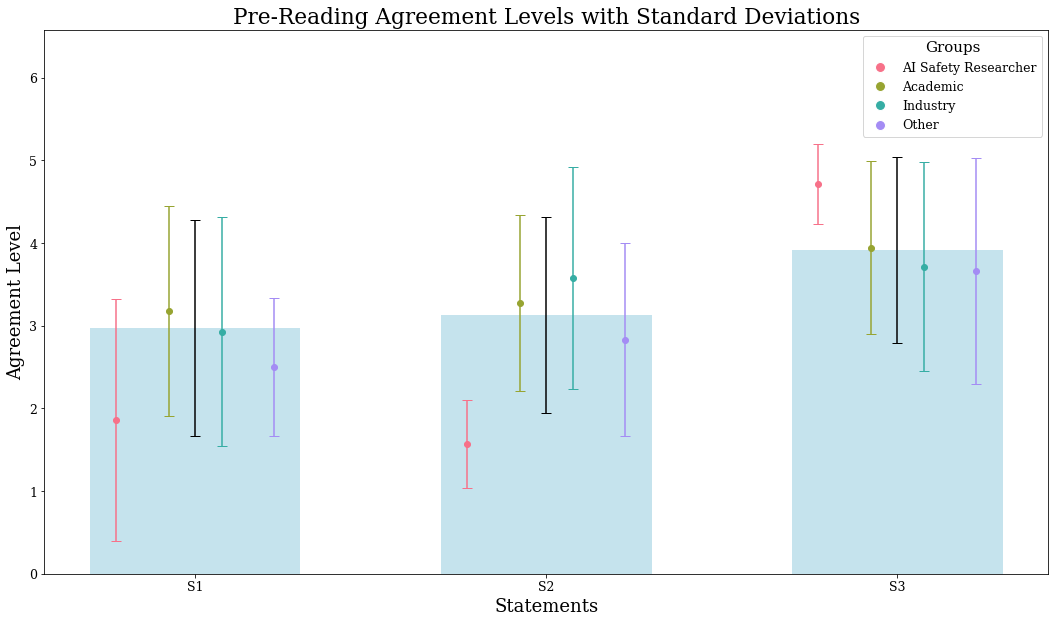

In [50]:
plot_agreement_levels(priority_questions, pre_means=pre_means, pre_group_means=pre_group_means, post_group_means=post_group_means, title='Pre-Reading Agreement Levels with Standard Deviations')